In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fear = pd.read_csv('fear_greed_index.csv')
hist = pd.read_csv('historical_data.csv')

In [3]:
fear.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
fear['date'] = pd.to_datetime(fear['date'])

hist['Timestamp IST'] = pd.to_datetime(hist['Timestamp IST'], errors='coerce')
hist['date'] = hist['Timestamp IST'].dt.date
hist['date'] = pd.to_datetime(hist['date'])


hist = hist[['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD',
             'Side', 'Timestamp IST', 'date', 'Start Position', 'Direction',
             'Closed PnL', 'Fee', 'Trade ID']]

In [6]:
merged = pd.merge(hist, fear[['date', 'classification', 'value']],
                  on='date', how='left')

print("\nMerged Data:")
merged.head()


Merged Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,date,Start Position,Direction,Closed PnL,Fee,Trade ID,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,2024-02-12,0.000000,Buy,0.0,0.345404,8.950000e+14,Greed,70.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,2024-02-12,986.524596,Buy,0.0,0.005600,4.430000e+14,Greed,70.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,2024-02-12,1002.518996,Buy,0.0,0.050431,6.600000e+14,Greed,70.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,2024-02-12,1146.558564,Buy,0.0,0.050043,1.080000e+15,Greed,70.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,2024-02-12,1289.488521,Buy,0.0,0.003055,1.050000e+15,Greed,70.0


In [7]:
sentiment_map = {
    "Extreme Fear": 0,
    "Fear": 1,
    "Neutral": 2,
    "Greed": 3,
    "Extreme Greed": 4
}

merged["sentiment_score"] = merged["classification"].map(sentiment_map)

merged["is_long"] = merged["Direction"].apply(lambda x: 1 if x == "Buy" else 0)

merged["is_profitable"] = merged["Closed PnL"] > 0

In [8]:
pnl_sentiment = merged.groupby("classification")["Closed PnL"].mean()

win_rate = merged.groupby("classification")["is_profitable"].mean() * 100

trade_size = merged.groupby("classification")["Size USD"].mean()

print("\nAverage PnL by Sentiment:")
display(pnl_sentiment)

print("\nWin Rate (%) by Sentiment:")
display(win_rate)

print("\nAvg Trade Size by Sentiment:")
display(trade_size)


Average PnL by Sentiment:


,Closed PnL
classification,
Extreme Fear,1.891632
Extreme Greed,205.816345
Fear,128.287950
Greed,53.988003
Neutral,27.088803



Win Rate (%) by Sentiment:


,is_profitable
classification,
Extreme Fear,29.277730
Extreme Greed,55.328233
Fear,38.178672
Greed,43.570670
Neutral,49.492017



Avg Trade Size by Sentiment:


,Size USD
classification,
Extreme Fear,4118.761840
Extreme Greed,3242.085086
Fear,5744.782685
Greed,5051.878829
Neutral,4332.202906


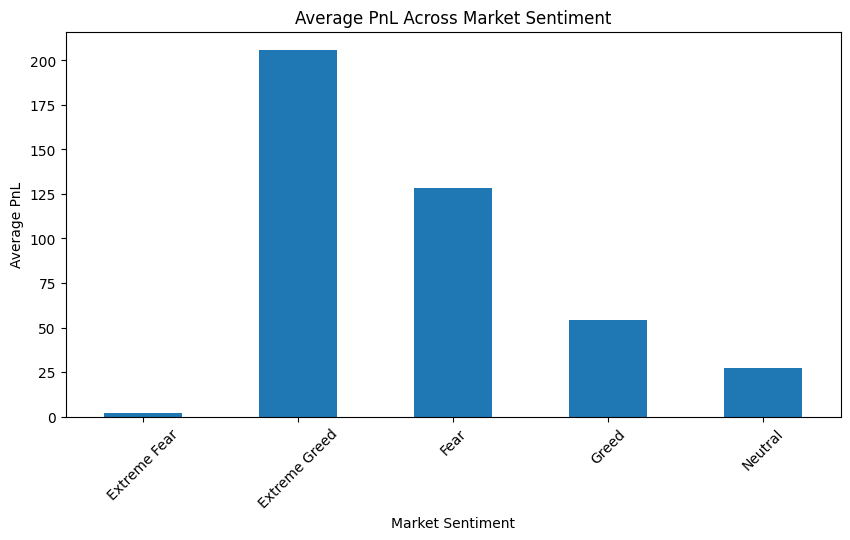

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

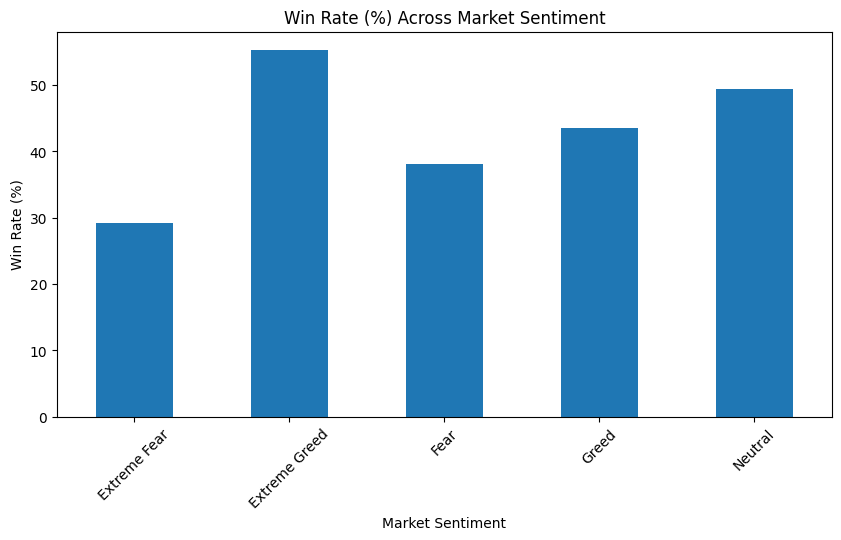

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

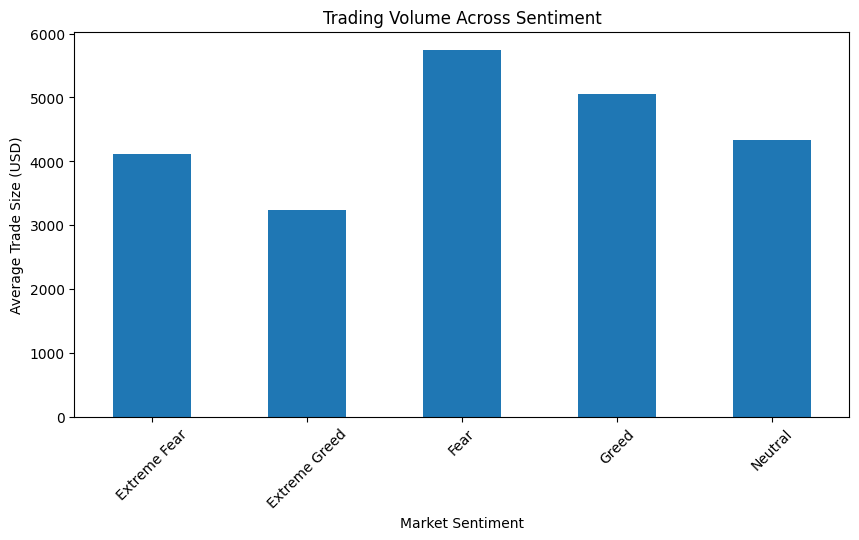

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from google.colab import files
import matplotlib.pyplot as plt

# ---- 1) PnL vs Sentiment ----
plt.figure(figsize=(10, 5))
pnl_sentiment.plot(kind='bar')
plt.title("Average PnL Across Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)

# Save image
plt.savefig("pnl_sentiment.png", bbox_inches="tight")
plt.show()

# Download image
files.download("pnl_sentiment.png")



plt.figure(figsize=(10, 5))
win_rate.plot(kind='bar')
plt.title("Win Rate (%) Across Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.xticks(rotation=45)

# Save image
plt.savefig("win_rate_sentiment.png", bbox_inches="tight")
plt.show()

# Download image
files.download("win_rate_sentiment.png")


# ---- 3) Trade Size vs Sentiment ----
plt.figure(figsize=(10, 5))
trade_size.plot(kind='bar')
plt.title("Trading Volume Across Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=45)

# Save image
plt.savefig("trade_size_sentiment.png", bbox_inches="tight")
plt.show()

# Download image
files.download("trade_size_sentiment.png")


In [10]:
correlation = merged[["sentiment_score", "Closed PnL"]].corr()
print("\nCorrelation Between Sentiment Score & PnL:")
display(correlation)


Correlation Between Sentiment Score & PnL:


,sentiment_score,Closed PnL
sentiment_score,1.000000,0.011881
Closed PnL,0.011881,1.000000


In [11]:
print("\n================= KEY INSIGHTS =================")

print(f"Sentiment with highest avg PnL: {pnl_sentiment.idxmax()} = {pnl_sentiment.max():.4f}")
print(f"Sentiment with lowest avg PnL: {pnl_sentiment.idxmin()} = {pnl_sentiment.min():.4f}")

print(f"\nHighest Win Rate sentiment: {win_rate.idxmax()} = {win_rate.max():.2f}%")
print(f"Lowest Win Rate sentiment: {win_rate.idxmin()} = {win_rate.min():.2f}%")

print("\nCorrelation between sentiment score and PnL:")
print(correlation.loc['sentiment_score', 'Closed PnL'])


================= KEY INSIGHTS =================
Sentiment with highest avg PnL: Extreme Greed = 205.8163
Sentiment with lowest avg PnL: Extreme Fear = 1.8916

Highest Win Rate sentiment: Extreme Greed = 55.33%
Lowest Win Rate sentiment: Extreme Fear = 29.28%

Correlation between sentiment score and PnL:
0.011880800743267335
